In [1]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/Mutualfund.csv')
df = pd.DataFrame(df)

df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [3]:
df

Date      High
0      1/1/2015   345.351
1      1/2/2015   348.990
2      1/5/2015   348.309
3      1/6/2015   337.182
4      1/7/2015   337.416
...         ...       ...
2254  2/26/2024  1012.645
2255  2/27/2024  1016.955
2256  2/28/2024  1006.881
2257  2/29/2024  1009.952
2258   3/1/2024  1027.068

[2259 rows x 2 columns]

In [4]:
df.isnull().sum()

Date    0
High    0
dtype: int64

In [5]:
df=df[["Date","High"]]
df.head()

Date     High
0  1/1/2015  345.351
1  1/2/2015  348.990
2  1/5/2015  348.309
3  1/6/2015  337.182
4  1/7/2015  337.416

In [6]:
df.columns = ['ds','y']
df['ds']=pd.to_datetime(df['ds'])
df.tail()

ds         y
2254 2024-02-26  1012.645
2255 2024-02-27  1016.955
2256 2024-02-28  1006.881
2257 2024-02-29  1009.952
2258 2024-03-01  1027.068

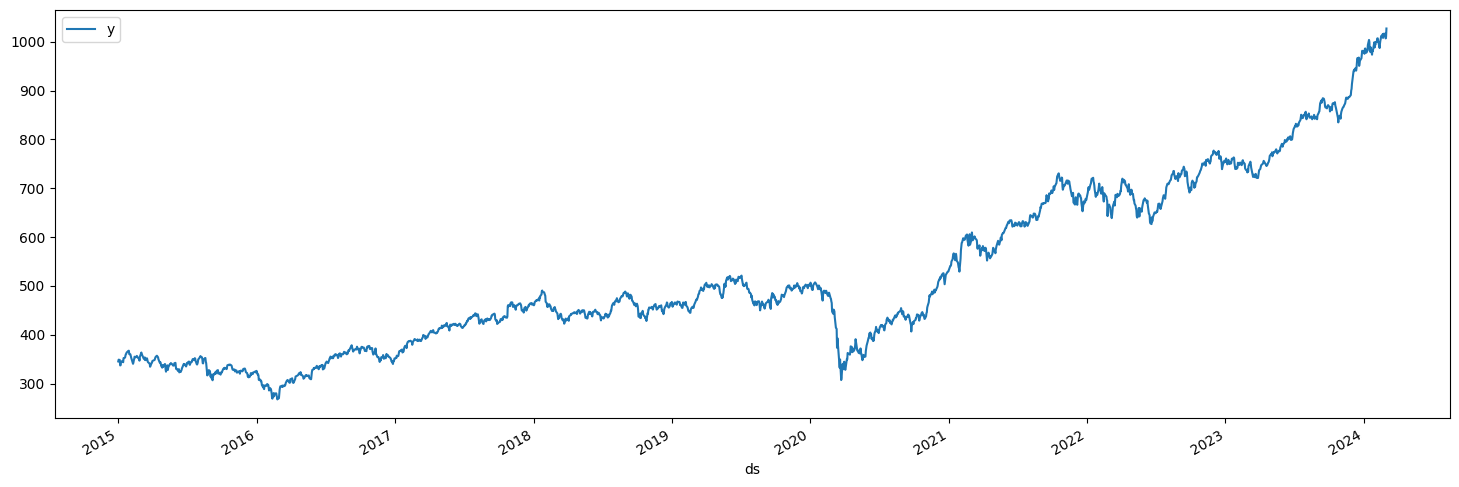

In [7]:
df.plot(x='ds',y='y',figsize=(18,6))
plt.show()

In [8]:
df = df[(df['ds'] >= '2020-05-01') & (df['ds'] <= '2024-01-30')]

# df = df[(df['ds'].dt.year >= 2022) & (df['ds'].dt.year <= df['ds'].dt.year.max())]

In [9]:
df

ds        y
1309 2020-05-04  369.884
1310 2020-05-05  366.986
1311 2020-05-06  367.946
1312 2020-05-07  364.580
1313 2020-05-08  362.935
...         ...      ...
2231 2024-01-23  973.543
2232 2024-01-24  983.106
2233 2024-01-25  980.511
2234 2024-01-29  998.866
2235 2024-01-30  988.373

[927 rows x 2 columns]

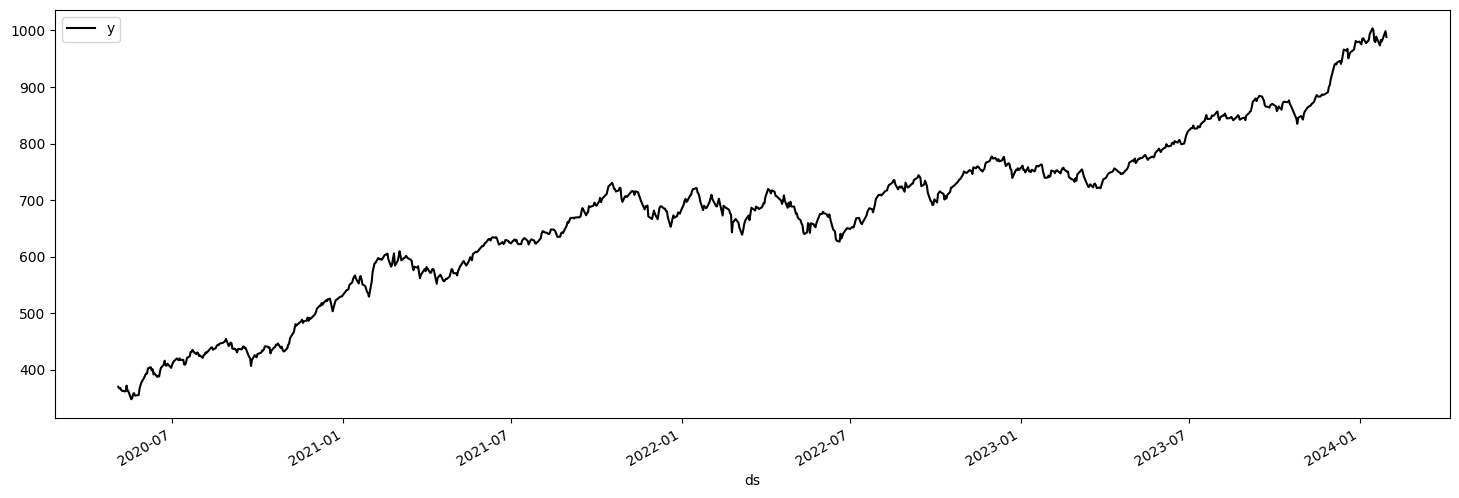

In [10]:
df.plot(x='ds',y='y',figsize=(18,6),color='black')
plt.show()

In [11]:
len(df)

927

In [12]:
train = df.iloc[:len(df)-25]
test = df.iloc[len(df)-25:]

In [13]:
train

ds        y
1309 2020-05-04  369.884
1310 2020-05-05  366.986
1311 2020-05-06  367.946
1312 2020-05-07  364.580
1313 2020-05-08  362.935
...         ...      ...
2206 2023-12-15  966.167
2207 2023-12-18  964.266
2208 2023-12-19  967.559
2209 2023-12-20  950.624
2210 2023-12-21  956.674

[902 rows x 2 columns]

In [14]:
test

ds         y
2211 2023-12-22   960.947
2212 2023-12-26   966.226
2213 2023-12-27   974.085
2214 2023-12-28   981.518
2215 2023-12-29   979.336
2216 2024-01-01   980.142
2217 2024-01-02   977.873
2218 2024-01-03   975.339
2219 2024-01-04   985.135
2220 2024-01-05   986.250
2221 2024-01-08   977.547
2222 2024-01-09   979.307
2223 2024-01-10   981.127
2224 2024-01-11   983.011
2225 2024-01-12   993.435
2226 2024-01-15  1003.744
2227 2024-01-16   999.596
2228 2024-01-17   981.649
2229 2024-01-18   979.390
2230 2024-01-19   988.945
2231 2024-01-23   973.543
2232 2024-01-24   983.106
2233 2024-01-25   980.511
2234 2024-01-29   998.866
2235 2024-01-30   988.373

In [15]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=1000) #MS for monthly, H for hourly
forecast = m.predict(future)

11:50:13 - cmdstanpy - INFO - Chain [1] start processing
11:50:13 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(480)

ds         yhat  yhat_lower   yhat_upper
1422 2025-05-25  1219.520003  893.984235  1544.983774
1423 2025-05-26  1228.429278  895.496252  1554.883254
1424 2025-05-27  1231.319016  894.548336  1551.402086
1425 2025-05-28  1233.572012  898.980051  1570.506466
1426 2025-05-29  1234.176170  898.893096  1560.971763
...         ...          ...         ...          ...
1897 2026-09-12  1535.250933  641.173614  2349.356246
1898 2026-09-13  1535.551000  625.713958  2355.826106
1899 2026-09-14  1543.035666  648.314749  2369.304187
1900 2026-09-15  1544.448417  645.643106  2375.752484
1901 2026-09-16  1545.185839  636.825771  2363.419669

[480 rows x 4 columns]

In [17]:
forecast['yhat']=(forecast['yhat']+forecast['yhat_upper'] )/ 2

In [18]:
plot_plotly(m ,forecast)

In [19]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-25:]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  960.3216419720222
Mean Value of Test Dataset: 982.3600399999999


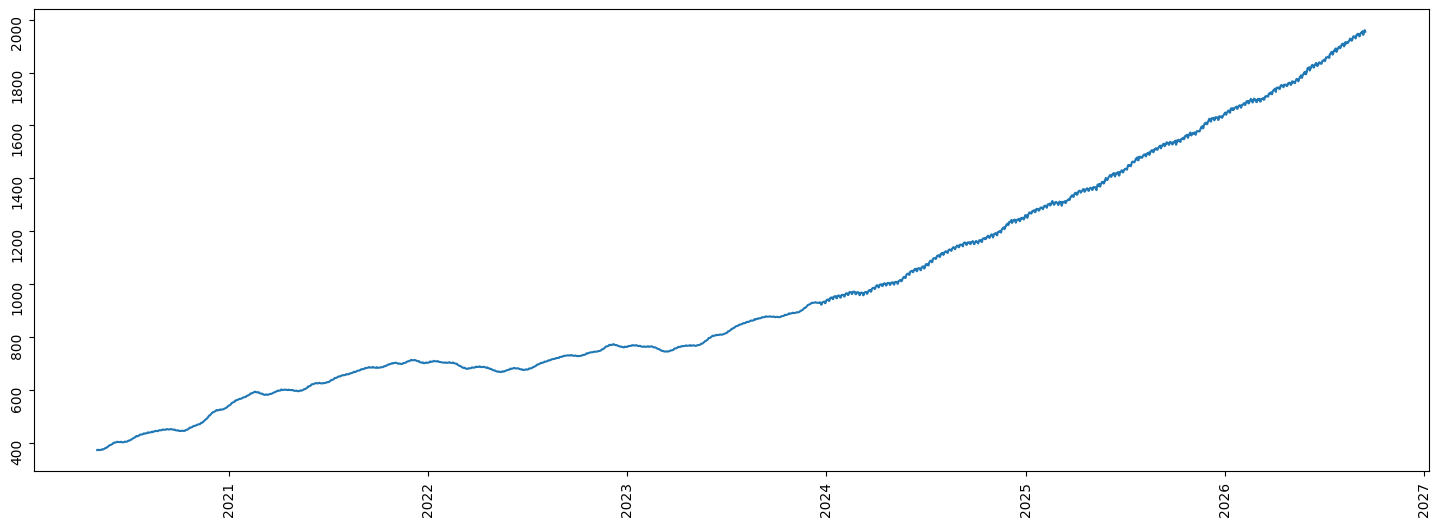

In [20]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

forecast = forecast.dropna(subset=['yhat'])

plt.figure(figsize=(18, 6))
plt.plot(forecast['ds'], forecast['yhat'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [21]:
forecast = forecast[(forecast['ds'] >= '2024-02-01') & (forecast['ds'].dt.year <= forecast['ds'].dt.year.max())]
forecast=forecast[['ds','yhat']]
forecast.reset_index(drop=True, inplace=True)

In [22]:
forecast

ds         yhat
0   2024-02-01   959.805182
1   2024-02-02   959.692320
2   2024-02-03   953.976610
3   2024-02-04   954.275305
4   2024-02-05   962.247169
..         ...          ...
954 2026-09-12  1942.303590
955 2026-09-13  1945.688553
956 2026-09-14  1956.169927
957 2026-09-15  1960.100451
958 2026-09-16  1954.302754

[959 rows x 2 columns]

In [23]:
result_df=pd.read_csv('E:/forecast.csv')
result_df = pd.DataFrame(result_df)

In [24]:
result_df

0             1           2             3           4  \
0    2024-01-01  4.005375e+06  2024-02-01  22018.440428  2024-02-01   
1    2024-01-02  3.998168e+06  2024-02-02  22005.386495  2024-02-02   
2    2024-01-03  4.015374e+06  2024-02-03  21330.332854  2024-02-03   
3    2024-01-04  4.046743e+06  2024-02-04  21377.546742  2024-02-04   
4    2024-01-05  4.045816e+06  2024-02-05  22088.238356  2024-02-05   
..          ...           ...         ...           ...         ...   
699         NaN           NaN         NaN           NaN  2025-12-31   
700         NaN           NaN         NaN           NaN         NaN   
701         NaN           NaN         NaN           NaN         NaN   
702         NaN           NaN         NaN           NaN         NaN   
703         NaN           NaN         NaN           NaN         NaN   

               5           6            7  
0    1633.417339  2024-02-01  5455.785286  
1    1630.507544  2024-02-02  5457.819141  
2    1707.703634  2024-02-03  5528.830115  
3    1621.516883  2024-02-04  5578.688063  
4    1643.368288  2024-02-05  5465.427292  
..           ...         ...          ...  
699  1759.657181  2025-12-31  6418.913370  
700          NaN  2026-01-01  6421.283712  
701          NaN  2026-01-02  6428.526998  
702          NaN  2026-01-03  6504.234517  
703          NaN  2026-01-04  6558.230757  

[704 rows x 8 columns]

In [25]:
result_df = pd.concat([result_df,forecast],axis=1,ignore_index=True)

In [26]:
result_df

0             1           2             3           4  \
0    2024-01-01  4.005375e+06  2024-02-01  22018.440428  2024-02-01   
1    2024-01-02  3.998168e+06  2024-02-02  22005.386495  2024-02-02   
2    2024-01-03  4.015374e+06  2024-02-03  21330.332854  2024-02-03   
3    2024-01-04  4.046743e+06  2024-02-04  21377.546742  2024-02-04   
4    2024-01-05  4.045816e+06  2024-02-05  22088.238356  2024-02-05   
..          ...           ...         ...           ...         ...   
954         NaN           NaN         NaN           NaN         NaN   
955         NaN           NaN         NaN           NaN         NaN   
956         NaN           NaN         NaN           NaN         NaN   
957         NaN           NaN         NaN           NaN         NaN   
958         NaN           NaN         NaN           NaN         NaN   

               5           6            7          8            9  
0    1633.417339  2024-02-01  5455.785286 2024-02-01   959.805182  
1    1630.507544  2024-02-02  5457.819141 2024-02-02   959.692320  
2    1707.703634  2024-02-03  5528.830115 2024-02-03   953.976610  
3    1621.516883  2024-02-04  5578.688063 2024-02-04   954.275305  
4    1643.368288  2024-02-05  5465.427292 2024-02-05   962.247169  
..           ...         ...          ...        ...          ...  
954          NaN         NaN          NaN 2026-09-12  1942.303590  
955          NaN         NaN          NaN 2026-09-13  1945.688553  
956          NaN         NaN          NaN 2026-09-14  1956.169927  
957          NaN         NaN          NaN 2026-09-15  1960.100451  
958          NaN         NaN          NaN 2026-09-16  1954.302754  

[959 rows x 10 columns]

In [27]:
result_df.to_csv('forecast.csv', index=False)